# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

In [3]:
# Creates empty lists to be populated during the api call
city_names = []
cloudiness = []
countries = []
dates = []
humidities = []
lat = []
lng = []
max_temps = []
wind_speeds = []

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Calls the weather api and populates the list with information
for city in cities:
    response = requests.get(query_url + city).json()

    try:
        city_names.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        countries.append(response["sys"]["country"])
        dates.append(response["dt"])
        humidities.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temps.append(response["main"]["temp_max"])
        wind_speeds.append(response["wind"]["speed"])
        print(f"Data for {city} has been processed successfully")
    except(KeyError):
        print(f"{city} could not be found...skipping")

ed successfully
Data for corinto has been processed successfully
Data for college has been processed successfully
qingan could not be found...skipping
Data for severodvinsk has been processed successfully
kamenskoye could not be found...skipping
Data for clyde river has been processed successfully
Data for flinders has been processed successfully
Data for valdosta has been processed successfully
Data for kondinskoye has been processed successfully
nizhneyansk could not be found...skipping
Data for flin flon has been processed successfully
Data for khorramshahr has been processed successfully
Data for ashington has been processed successfully
Data for arraial do cabo has been processed successfully
Data for dunedin has been processed successfully
Data for sioux lookout has been processed successfully
Data for bethel has been processed successfully
Data for gamba has been processed successfully
Data for dingle has been processed successfully
Data for sao joao da barra has been processed 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Builds a dataframe out of the newly populated lists
weather_dict = {
    "City" : city_names,
    "Cloudiness" : cloudiness,
    "Country" : countries,
    "Date" : dates,
    "Humidity" : humidities,
    "Lat" : lat,
    "Lng" : lng,
    "Max Temp" : max_temps,
    "Wind Speed" : wind_speeds
}

# Saves the dataframe as a csv so the api call is not necessary when opening the file at a later time
weather_df = pd.DataFrame(weather_dict)
weather_df.to_csv("weather_data.csv")
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Dikson,100,RU,1587234480,91,73.51,80.55,35.91,18.05
1,Khuzhir,85,RU,1587234480,85,53.19,107.34,26.28,10.51
2,Albany,98,US,1587234231,70,42.60,-73.97,43.00,6.85
3,Butaritari,98,KI,1587234480,78,3.07,172.79,82.04,14.43
4,Djibouti,75,DJ,1587234481,74,11.50,42.50,86.00,4.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [2]:
# Reading in the data off the csv so that the API doesn't have to be called each time the file is opened. 
data = pd.read_csv("weather_data.csv")
cities_df = pd.DataFrame(data)
cities_df.head()

,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,Dikson,100,RU,1587234480,91,73.51,80.55,35.91,18.05
1,1,Khuzhir,85,RU,1587234480,85,53.19,107.34,26.28,10.51
2,2,Albany,98,US,1587234231,70,42.60,-73.97,43.00,6.85
3,3,Butaritari,98,KI,1587234480,78,3.07,172.79,82.04,14.43
4,4,Djibouti,75,DJ,1587234481,74,11.50,42.50,86.00,4.70


#### Latitude vs. Temperature Plot

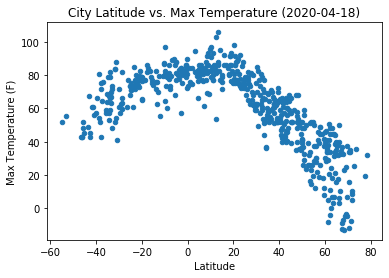

In [3]:
cities_df.plot(kind="scatter", x="Lat", y="Max Temp")
plt.title(f"City Latitude vs. Max Temperature ({date.today()})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.savefig("output/fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

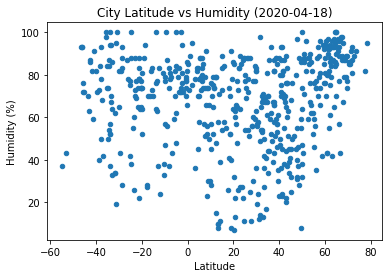

In [4]:
cities_df.plot(kind = "scatter", x = "Lat", y = "Humidity")
plt.title(f"City Latitude vs Humidity ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output/fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

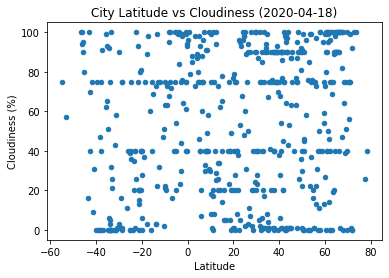

In [5]:
cities_df.plot(kind = "scatter", x = "Lat", y = "Cloudiness")
plt.title(f"City Latitude vs Cloudiness ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output/fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

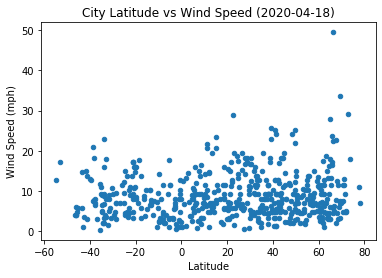

In [6]:
cities_df.plot(kind = "scatter", x = "Lat", y = "Wind Speed")
plt.title(f"City Latitude vs Wind Speed ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output/fig4.png")
plt.show()

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots
def regress_func(x_vals, y_vals):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
    regress_values = x_vals * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_vals,y_vals)
    plt.plot(x_vals,regress_values,"r-")
    return line_eq, rvalue

In [16]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = cities_df[cities_df["Lat"] > 0]
southern_df = cities_df[cities_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

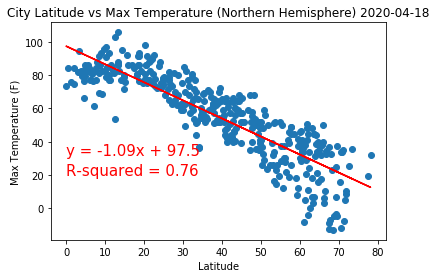

In [17]:
line_eq, rvalue = regress_func(northern_df["Lat"], northern_df["Max Temp"])

plt.title(f"City Latitude vs Max Temperature (Northern Hemisphere) {date.today()}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.annotate(line_eq,(0,32),fontsize=15,color="red")
plt.annotate(f"R-squared = {round(rvalue**2, 2)}",(0,20),fontsize=15,color="red")
plt.savefig("output/fig5.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

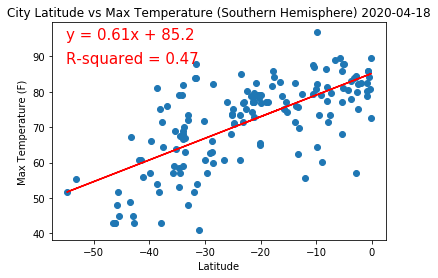

In [18]:
line_eq, rvalue = regress_func(southern_df["Lat"], southern_df["Max Temp"])

plt.title(f"City Latitude vs Max Temperature (Southern Hemisphere) {date.today()}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.annotate(line_eq,(-55,95),fontsize=15,color="red")
plt.annotate(f"R-squared = {round(rvalue**2, 2)}",(-55,88),fontsize=15,color="red")
plt.savefig("output/fig6.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

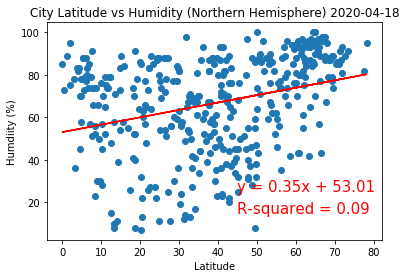

In [21]:
line_eq, rvalue = regress_func(northern_df["Lat"], northern_df["Humidity"])

plt.title(f"City Latitude vs Humidity (Northern Hemisphere) {date.today()}")
plt.xlabel("Latitude")
plt.ylabel("Humdiity (%)")
plt.annotate(line_eq,(45,25),fontsize=15,color="red")
plt.annotate(f"R-squared = {round(rvalue**2, 2)}",(45,15),fontsize=15,color="red")
plt.savefig("output/fig7.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

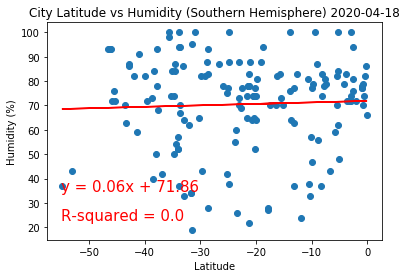

In [22]:
line_eq, rvalue = regress_func(southern_df["Lat"], southern_df["Humidity"])

plt.title(f"City Latitude vs Humidity (Southern Hemisphere) {date.today()}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(-55,35),fontsize=15,color="red")
plt.annotate(f"R-squared = {round(rvalue**2, 2)}",(-55,23),fontsize=15,color="red")
plt.savefig("output/fig8.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

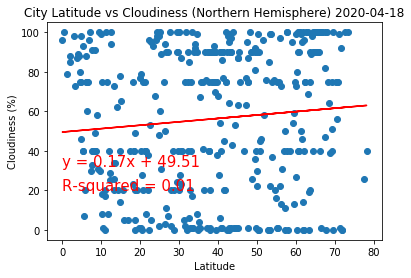

In [23]:
line_eq, rvalue = regress_func(northern_df["Lat"], northern_df["Cloudiness"])

plt.title(f"City Latitude vs Cloudiness (Northern Hemisphere) {date.today()}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(0,32),fontsize=15,color="red")
plt.annotate(f"R-squared = {round(rvalue**2, 2)}",(0,20),fontsize=15,color="red")
plt.savefig("output/fig9.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

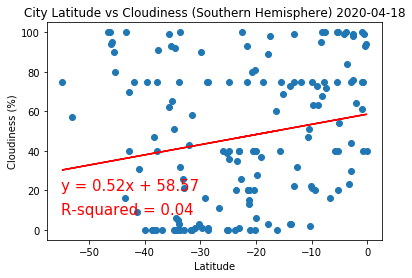

In [24]:
line_eq, rvalue = regress_func(southern_df["Lat"], southern_df["Cloudiness"])

plt.title(f"City Latitude vs Cloudiness (Southern Hemisphere) {date.today()}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.annotate(f"R-squared = {round(rvalue**2, 2)}",(-55,8),fontsize=15,color="red")
plt.savefig("output/fig10.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

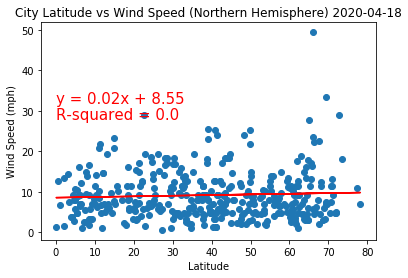

In [25]:
line_eq, rvalue = regress_func(northern_df["Lat"], northern_df["Wind Speed"])

plt.title(f"City Latitude vs Wind Speed (Northern Hemisphere) {date.today()}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq,(0,32),fontsize=15,color="red")
plt.annotate(f"R-squared = {round(rvalue**2, 2)}",(0,28),fontsize=15,color="red")
plt.savefig("output/fig11.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

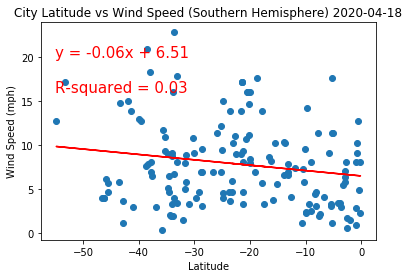

In [26]:
line_eq, rvalue = regress_func(southern_df["Lat"], southern_df["Wind Speed"])

plt.title(f"City Latitude vs Wind Speed (Southern Hemisphere) {date.today()}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.annotate(f"R-squared = {round(rvalue**2, 2)}",(-55,16),fontsize=15,color="red")
plt.savefig("output/fig12.png")
plt.show()